# Activity on Testing of Hypothesis

1. Carry out descriptive analytics on the dataset.
2. Check whether female and male students scored the same marks.
3. Whether test preparation helps the students

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats


In [72]:
# Reading dataset
data=pd.read_csv('Week_8_Q&A_dataset - Sheet1.csv')
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


# 1. Carry out descriptive analytics on the dataset

**Analysing dataset based on gender**

In [73]:
 data.groupby('Gender').describe()

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

<function matplotlib.pyplot.show(close=None, block=None)>

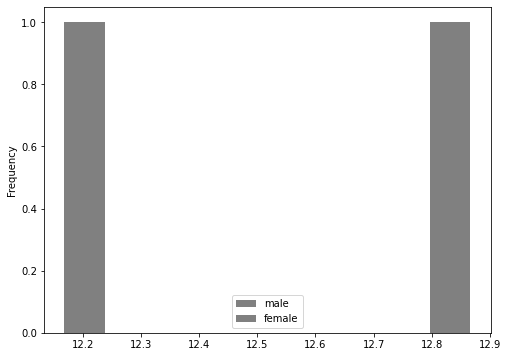

In [75]:
gender_std=data.groupby('Gender')['Total Marks'].std()
gender_std.plot(kind='hist',figsize=(8,6),color='grey')
plt.legend(data['Gender'])
plt.show

* **The standard deviation of scores of male and female are slightly different.**
* **From the table and histogram it is clear that female are ahead of male in scoring marks.**

**Analysing dataset based on Test preparation course**

In [74]:
data.groupby('Test preparation').describe()

Total Marks                                                \
                       count       mean        std   min   25%   50%   75%   
Test preparation                                                             
completed                7.0  44.571429   3.359422  40.0  43.0  44.0  46.0   
none                    21.0  28.238095  11.661495  12.0  18.0  27.0  38.0   

                        
                   max  
Test preparation        
completed         50.0  
none              48.0

<function matplotlib.pyplot.show(close=None, block=None)>

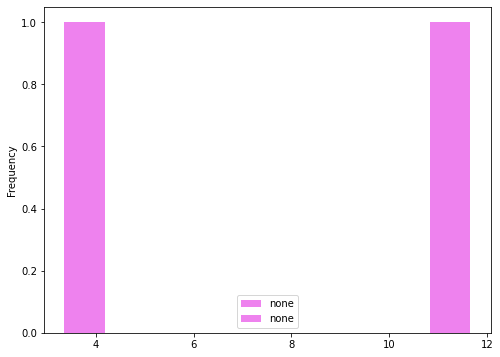

In [77]:
test_std=data.groupby('Test preparation')['Total Marks'].std()
test_std.plot(kind='hist',figsize=(8,6),color='violet')
plt.legend(data['Test preparation'])

plt.show

* **The standard deviation of Test preparation also different with respect to students who completed and not completed.it is a big difference.**
* **From the table and histogram,we can see that students who completed the test preparation top scored than not completed students.**

# 2. Check whether female and male students scored the same marks.

 Here, we can use Two sampled t test.
 Setting up the two hypothesis:
 
   **Ho : The marks of female and male students are same**
   
   **H1 : The marks of female and male students are not same**


In [33]:
# Marks of female in the data
female=data[data['Gender']=='female']
female[['Gender','Total Marks']].head()

,Gender,Total Marks
1,female,28
2,female,18
3,female,48
4,female,21
5,female,40


In [34]:
# Marks of male in the data
male=data[data['Gender']=='male']
male[['Gender','Total Marks']].head().reset_index()

,index,Gender,Total Marks
0,0,male,14
1,6,male,30
2,8,male,18
3,9,male,24
4,10,male,44


In [35]:
# Assigning the the two samples into variables,a and b respectively
a=female['Total Marks']
b=male['Total Marks']

In [65]:
# calculating t score using scipy
scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)

Ttest_indResult(statistic=0.6940885268848668, pvalue=0.4937822317960763)

* **since p value(0.4937822317960763)is greater than the level of significance(0.025) we fail to reject the null hypothesis.**
* **That is marks scored by  male and female are same.**

# 3. Whether test preparation helps the students

Here, we can also use Two sampled t test. Setting up the two hypothesis:
    
  **Ho :Test preparation doesn't help students**
        
  **H1 :Test preparation helps the students** 

In [70]:
# marks of students who completed test preparation course
test_completed=data[data['Test preparation']=='completed']
test_completed[['Test preparation','Total Marks']].head().reset_index()

,index,Test preparation,Total Marks
0,5,completed,40
1,10,completed,44
2,12,completed,43
3,16,completed,48
4,21,completed,44


In [73]:
# marks of students who not completed test preparation course
test_none=data[data['Test preparation']=='none']
test_none[['Test preparation','Total Marks']].head().reset_index()

,index,Test preparation,Total Marks
0,0,none,14
1,1,none,28
2,2,none,18
3,3,none,48
4,4,none,21


In [75]:
# Assigning the the two samples into variables,x and y respectively
x=test_completed['Total Marks']
y=test_none['Total Marks']

In [76]:
# calculating t score using scipy
scipy.stats.ttest_ind(x, y, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)

Ttest_indResult(statistic=3.6143637527769217, pvalue=0.0012671292457320106)

* **Here the p value(0.0012671292457320106)is less than the level of significance(0.025),so we can reject the null hypothesis**
* **That is, the test preparation course helpes students.**

submitted by:**Shameema Muneer,DSA_Bach3**